<a href="https://colab.research.google.com/github/f4416/ek381_stats_labs/blob/lab_6/ek381lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EK381 Exploratory Data Analysis <br> Lab 6: Covariances, Correlation Coefficients, and Best Linear Fit

### This lab was completed by Fairuz Abushgarah.

In the previous lab, we examined 3d plots of the joint PDF alongside 2d scatter plots of data generated according to the joint PDF. This lab explores the concepts of covariance and correlation coefficients, which provide a scalar summary of the average linear relationship between two random variables. Of course, the relationship between a pair of random variables is often more complex, but the covariance is still quite useful. We will start by looking at some basic examples to build intuition and work all the way to seeing what can go wrong due to outliers.

**The homework and exams include questions that ask you to roughly estimate the covariance and correlation from scatter plots, joint PDFs, and other information. This lab gives you opportunities to explore these concepts visually.**

**Please do not clear outputs for this lab, the outputs are small enough for Gradescope.**

Recall that, for a pair of random variables $X$ and $Y$, the **covariance** is $$\mathrm{Cov}[X,Y] = \mathbb{E}\big[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])\big] = \mathbb{E}[XY] - \mathbb{E}[X] \, \mathbb{E}[Y]\ .$$ While this might seem to come out of nowhere, it shows up in many scenarios and will seem like a natural definition in retrospect. The important thing to remember now is that it captures the *average linear relationship between $X$ and $Y$.* If the covariance is positive, then a line with positive slope is a better fit to the distribution than a line with negative slope. If the covariance is negative, then a line with negative slope is a better fit than a line with positive slope. Finally, if the covariance is exactly $0$, then all lines fit the distribution equally poorly.  

We will also examine the **correlation coefficient** that acts as a scale-invariant version of the covariance,
$$\rho_{X,Y} = \frac{\mathrm{Cov}[X,Y]}{\sqrt{ \mathrm{Var}[X] \, \mathrm{Var}[Y]}} \ . $$ One nice feature of the correlation coefficient is that as it gets closer to $+1$, we know that the distribution is better approximated by a line of positive slope. Similarly, as it gets closer to $-1$, we know it is better approximated by a line of negative slope. At the extremes, when $\rho_{X,Y} = +1$ or $-1$, we know that the distribution lies perfectly on a line.

How are these quantities calculated from real data? Say we have a dataset consisting of $n$ pairs $(X_1,Y_1),\ldots,(X_n,Y_n)$. Recall that the **sample means** of $X$ and $Y$ are just averages of the available data,
$$\hat{\mu}_X = \frac{1}{n} \sum_{i=1}^n X_i \qquad \hat{\mu}_Y = \frac{1}{n} \sum_{i=1}^n Y_i\ . $$
Similarly, the **sample covariance** of $X$ and $Y$ is
$$\hat{C}_{X,Y} = \frac{1}{n-1} \sum_{i=1}^n (X_i - \hat{\mu}_X)(Y_i - \hat{\mu}_Y) \ . $$ As we saw in the previous lab, given enough data, the estimate of a function will converge to the true expected value of the function. Thus, the sample covariance will converge to the true covariance. (We will discuss why it is standard to divide by $n-1$ rather than $n$ in Chapter 9.)

We also recall the **sample variances** for $X$ and $Y$
$$\hat{\sigma}^2_X = \frac{1}{n-1} \sum_{i=1}^n (X_i - \hat{\mu}_X)^2 \qquad \hat{\sigma}^2_Y = \frac{1}{n-1} \sum_{i=1}^n (Y_i - \hat{\mu}_Y)^2\ , $$ which enable us to estimate the variances $\mathrm{Var}[X]$ and $\mathrm{Var}[Y]$. Combining these ehstimates with the sample covariance, we get the **sample correlation coefficient,**
$$ \hat{\rho}_{X,Y} = \frac{\hat{C}_{X,Y}}{\sqrt{\hat{\sigma}_X^2 \hat{\sigma}_Y^2}} \ . $$ Note that you do not need to implement these functions as part of the lab (that was the focus of the programming assignment in prior version of EK381), but it is helpful to see that all data points contribute equally to the estimate. Therefore, if there are any outliers, they may skew our estimates considerably. Visualization is a useful technique to identify when outliers may be corrupting our estimates.

In [ ]:
#numpy is a package for working with arrays, linear algebra, etc. and stands for "numerical Python".
import numpy as np
#pandas is a package for working with data frames.
import pandas as pd
#matplotlib is a plotting library that mimics Matlab conventions.
import matplotlib.pyplot as plt
#seaborn is a data visualization package.
import seaborn as sns
#scipy.stats is a statistics library
import scipy.stats as st

The code below generates (X,Y) pairs of random variables according to a noisy linear function relating X and Y. (You can think of Z as independent noise that linearly combined with X to get Y.) It then calculates the sample covariance matrix $\mathbf{\hat{\Sigma}}$, which is displayed in the following standard format
$$\mathbf{\hat{\Sigma}}=\begin{bmatrix} \hat{\sigma}^2_X & \hat{C}_{X,Y} \\ \hat{C}_{Y,X} & \hat{\sigma}_Y^2 \end{bmatrix} \ . $$ Notice that the sample covariance that we want appears on the upper-right, off-diagonal term. It actually also appears in the lower-left, off-diagonal as well since $\hat{C}_{Y,X} = \hat{C}_{X,Y}$. The diagonal terms are sample variances since $\hat{C}_{X,X} = \hat{\sigma}_X^2$ and $\hat{C}_{Y,Y} = \hat{\sigma}_Y^2$. Similarly, the correlation coefficient matrix is the following standard format
$$\mathbf{\hat{\rho}}=\begin{bmatrix} 1 & \hat{\rho}_{X,Y} \\ \hat{\rho}_{Y,X} &1 \end{bmatrix} \ . $$ Again, the sample correlation coefficient we want is in the upper-right, off-diagonal term, and the lower-left, off-diagonal term turns out to be equal since $\hat{\rho}_{Y,X} = \hat{\rho}_{X,Y}$. The diagonal terms are all $1$ since $\hat{\rho}_{X,X} = 1$ and $\hat{\rho}_{Y,Y} = 1$.

Although it might seem more convenient and intuitive to just look at the scalar quantity of interest, this matrix format provides a concise way to understand all of the quantities that arise when we have more than $2$ random variables, which is often the case in practice.

The code also plots the samples on a scatter plot along with the best linear fit provided by a standard linear regression. The function `sns.regplot` does all of this at once. (The parameter `ci = None` is there to turn off the visualization for the confidence interval, which we will introduce later.)

Covariance Matrix


,X,Y
X,1.299844,1.309066
Y,1.309066,1.399977


Correlation Coefficient Matrix


,X,Y
X,1.00000,0.97041
Y,0.97041,1.00000


Slope = 1.007094757424682 Intercept = 0.4812300886002423


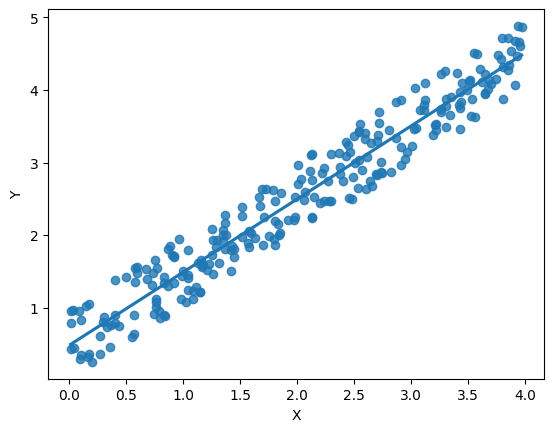

In [ ]:
num_samples = 250
a = 1
b = 1
X = st.uniform.rvs(size=num_samples,scale=4)
Z = st.uniform.rvs(size=num_samples)
Y = a*X + b*Z
linear_df = pd.DataFrame({"X":X,"Y":Y})
covXY = linear_df.cov()
corrXY = linear_df.corr()
sns.regplot(data=linear_df,x="X",y="Y",ci=None)
regression = st.linregress(X,Y)
print("Covariance Matrix")
display(covXY)
print("Correlation Coefficient Matrix")
display(corrXY)
print("Slope = " + str(regression.slope), "Intercept = " + str(regression.intercept))

#### For problems L6.1 through L6.3 below, you'll need to play with the values of a and b above, then run the cell to get the corresponding covariance matrix, correlation coefficient matrix, and scatter plot with best linear fit. Recall from above that the values of the covariance and correlation coefficient that we are referring to appear in the off-diagonal entries of the matrix.

---
####  L6.1 If the covariance is close to 1, does that mean that the line is always near-perfect fit? Include in your answer the values of a, b that allowed you to reach this conclusion.

#### Answer: No, the correlation coefficient is not the same as the slope of the regression line. The correlation measures the strength and direction of a linear relationship, while the slope depends on the units of X and Y


#### a = 3
#### b = 1
#### This results in a positive correlation --- but the best-fit line will differ from the correlation value


---

---
####  L6.2 If the correlation coefficient is close to 1, does that mean that the line is always near-perfect fit? Write down the values of a, b that allowed you to reach this conclusion.

#### Answer:Yes, if the correl. coeff. is close to 1
---

---
####  L6.3 Is the correlation coefficient equal to the slope of the line? Write down the values of a, b that allowed you to reach this conclusion.

#### Answer: No, the correlation coefficient is not the same as the slope of the regression line. The correlation measures the strength and direction of a linear relationship, while the slope depends on the units of X and Y.


#### a = 3
#### b = 1
#### This results in a positive correlation, but the slope of the best fit line will differ from the value.
---

In [ ]:
num_samples = 250
a = 1
b = 1
X = st.uniform.rvs(size=num_samples,scale=2)
Z = st.uniform.rvs(size=num_samples)
Y = a*X**3 + b*Z
nonlinear_df = pd.DataFrame({"X":X,"Y":Y})
covXY = nonlinear_df.cov()
corrXY = nonlinear_df.corr()
sns.regplot(data=nonlinear_df,x="X",y="Y",ci=None)
regression = st.linregress(X,Y)
print("Covariance Matrix")
display(covXY)
print("Correlation Coefficient Matrix")
display(corrXY)
print("Slope = " + str(regression.slope), "Intercept = " + str(regression.intercept))

---
####  L6.4 The data in `nonlinear_df` above is generated using a noisy, non-linear function. Are there any choices of a and b that allow you to reach a correlation coefficient of $1$ exactly? Write down the values of a, b that allowed you to reach this conclusion.

#### Answer:
#### a =
#### b =
---

In [ ]:
num_samples = 250
theta = 2 * np.pi * st.uniform.rvs(size=num_samples)
X = np.cos(theta)
Y = np.sin(theta)
circle_df = pd.DataFrame({"X":X,"Y":Y})
covXY = circle_df.cov()
corrXY = circle_df.corr()
sns.regplot(data=circle_df,x="X",y="Y",ci=None)
regression = st.linregress(X,Y)
print("Covariance Matrix")
display(covXY)
print("Correlation Coefficient Matrix")
display(corrXY)
print("Slope = " + str(regression.slope), "Intercept = " + str(regression.intercept))

---
####  L6.5 For the data in `circle_df`, the covariance and correlation coefficient are very close to zero. Does this mean that there is no way to predict the value of Y using the values of X? For example, if you know that Y = 1, can you do any better than saying X is between -1 and 1? Explain why this does not contradict the fact that the covariance and correlation coefficient are essentially zero.

#### Answer:
---

Anscombe's quartet is a famous dataset that is used to illustrate the issues that arise when we only rely on simply summary statistics, such as the correlation coefficient. It consists of four datasets, each with 11 (x,y)-pairs. Each dataset has the same mean, variance, covariance, and correlation coefficient. Therefore, they will all have the same best linear fit from a standard linear regression as shown below. However, a visual inspection should convince you that this linear fit may not tell the whole story.

In [ ]:
# Load the (built-in) dataset known as Anscombe's quartet
anscombe_df = sns.load_dataset("anscombe")

# Plot the four datasets along with the best linear fit
sns.lmplot(
    data=anscombe_df, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

---
####  L6.6 For each dataset in Anscombe's quartet, describe why the line does not fit perfectly. For each scenario, state whether you would prefer to keep this line to predict the dataset, use a different linear fit (say how you would choose this line if so), or use a non-linear function.

#### Dataset I:
#### Dataset II:
#### Dataset III:
#### Dataset IV:
---


One thing to take away from Anscombe's quartet is that outlier data points can always corrupt our statistics and any functions that we fit using these values.

In [ ]:
#This code constructs a small dataset with a positive covariance.
num_samples = 12
X = st.uniform.rvs(size=num_samples,scale=1)
Z = st.uniform.rvs(size=num_samples)
Y = X + 0.3*Z
original_df = pd.DataFrame({"X":X,"Y":Y})
original_covXY = original_df.cov()
original_corrXY = original_df.corr()
print("Original Covariance Matrix")
display(original_covXY)
print("Original Correlation Coefficient Matrix")
display(original_corrXY)
sns.regplot(data=original_df,x="X",y="Y",ci=None)

---
####  L6.7 Using the cell below, insert a single outlier that can corrupt the dataset into having a negative correlation coefficient. You can modify the code above to display the corrupted correlation coefficient as well as a scatter plot with the best linear fit. Does the visualization allow you to immediately notice the outlier? Report the x and y values of the outlier that resulted in a negative correlation coefficient.

#### Answer:
#### xvalue =
#### yvalue =
---

In [ ]:
corrupted_df = original_df.copy(deep=True)
#You need to select the values of this new row, which are currently set to zero.
corrupted_df.loc[len(corrupted_df)] = [0,0]
#Now, determine the correlation coefficient matrix of this corrupted dataframe.

#Finally, create a scatter plot with the best linear fit so you can clearly see the outlier.
